## Time Evolution of a Gaussian wavepacket in infinite well

Since 
$$\phi(0) = \sum_{i}c_i\phi_{\epsilon_i}$$
We get
$$c_i = \phi_{\epsilon_i}^{\dagger}\ \phi(0)$$
From here we compute all the coefficients $c_i$
Then we have:
$$\phi(\tau) = \sum_{i} c_i e^{-i\epsilon_i \tau} \phi_{\epsilon_i}$$

### Gaussian wavepacket

At time $t = 0$
$$\psi(x) = \bigg(\frac{1}{\pi \Delta^2}\bigg)^{1/4} e^{-(x-x_0)^2/2\Delta^2}e^{ip_0x/\hbar}$$
Here $\Delta$ is the standard deviation or the spread in position of the particle.

With $\Delta = l_0$ the natural length scale and $\hbar/\Delta$ as natural momentum scale we get:

$$\phi(\tilde{x}) = \bigg(\frac{1}{\pi \Delta^2}\bigg)^{1/4}e^{-(\tilde{x} - \tilde{x_0})^2/2}e^{i\tilde{p_0}\tilde{x}}$$

Still it has $[L]^{-1/2}$ dimensions so multiplying by $\sqrt{\Delta}$. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as alg
plt.style.use('seaborn-whitegrid')

In [3]:
def kro(i,j):
    return 1 if i==j else 0

def U(ys,i):
    return 0 if abs(ys[i])>=0.5 else -V0

def H_ele(i,j,dy,ys): 
    return (-kro(i+1,j) + 2*kro(i,j) -kro(i-1,j))/dy**2  + U(ys,i)*kro(i,j)

In [4]:
def phi0(ys):
    return (1/pow(np.pi*(a**2),0.25))*np.exp(-((ys-b)**2)/(2.0*a**2) - 1j*p0*ys)

In [5]:
a = 1.0 ## natural length scale - std deviation of wavepacket at t=0
b = -7.0 ## position of centre of the packet at t=0
p0 = 10.0 ## central momentum 
V0 = 100 ## in units of natural energy scale

dy = 0.05 # discretization of space 
y_lim = 30.0 # yspace half-width

ys = np.arange(-y_lim,y_lim,dy) # space points
N = len(ys)
print(N)
H = [[H_ele(i,j,dy,ys) for i in range(N)] for j in range(N)] # Hamiltonian N*N matrix
#print(H)

1200


In [6]:
Phi0 = np.sqrt(dy)*phi0(ys) ## values of initial wavepacket at all lattice points

In [7]:
H_eigs, H_eigvs = alg.eig(H)

H_eigvalues = np.sort(H_eigs) # sorted eigenvalues
H_eigvectors = np.zeros((N,N))# to hold sorted eigenvectors

# loop to arrange eigenvectors in corresponding order of sorted eigenvalues #
for i in range(N):
    for j in range(N):
        if H_eigs[j] == H_eigvalues[i]:
            H_eigvectors[:,i] = H_eigvs[:,j]
            continue

In [8]:

ci_s = [np.vdot(Phi0, H_eigvectors[:,i]) for i in range(N)] # coefficients

def Phi_tau(tau): # computes the wavepacket at time tau
    summation = np.zeros((N), dtype = 'complex')
    for i in range(N):
        summation += ci_s[i]*np.exp(-1j*H_eigvalues[i]*tau)*H_eigvectors[:,i]
    return summation

Prob_t = np.abs(Phi_tau(0.8))**2

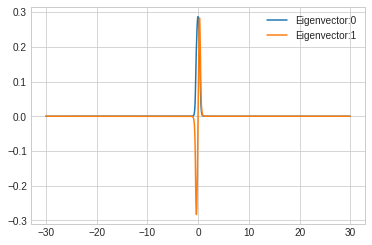

In [9]:
fig = plt.figure()
ax = fig.add_subplot()

for i in range(0,2):
    ax.plot(ys,H_eigvectors[:,i],label = 'Eigenvector:%d'%i)
ax.legend()

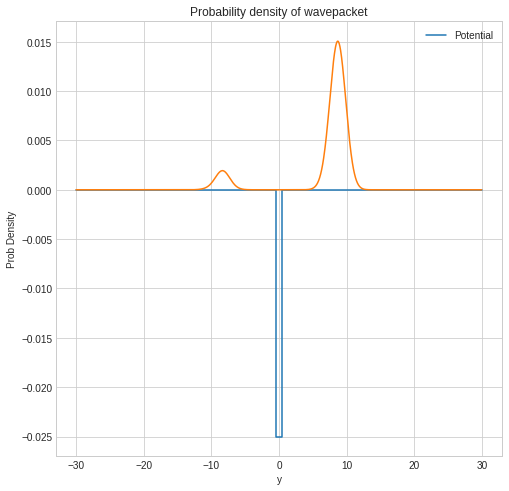

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

ax.plot([-y_lim,-0.5,-0.5,0.5,0.5,y_lim], [0,0,-10*dy*dy,-10*dy*dy,0,0],label = 'Potential')
ax.plot(ys,Prob_t)
ax.set(title = 'Probability density of wavepacket',xlabel = 'y',ylabel = 'Prob Density')
ax.legend()

### Reflection and Transmission Coefficients

In [15]:
totalP = sum(Prob_t)
R = 0.
T = 0.
for i in range(N):
    if ys[i]<=0.5:
        R+= Prob_t[i] 
        continue
    
    elif ys[i]>=0.5:
        T += Prob_t[i]
        continue
        
    else:
        continue
        
R /= totalP
T /= totalP
print("Transmission coefficient = ",T)
print("Reflection coefficient = ",R)
print("R+T = ",R+T)

Transmission coefficient =  0.8900786589624069
Reflection coefficient =  0.10992134103759277
R+T =  0.9999999999999997
0.9999999999999633
